In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel('../Data/monthly_data_total.xlsx')

In [5]:
df.head()

Date    Import    Export
0 2006-01-01  12519.71   9143.66
1 2006-02-01  11479.69   8993.29
2 2006-03-01  14314.02  11560.97
3 2006-04-01  12924.18   8624.66
4 2006-05-01  15105.67  10109.30

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    165 non-null    datetime64[ns]
 1   Import  165 non-null    float64       
 2   Export  165 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.9 KB


In [7]:
df.index = df.Date

In [8]:
df.head()

Date    Import    Export
Date                                     
2006-01-01 2006-01-01  12519.71   9143.66
2006-02-01 2006-02-01  11479.69   8993.29
2006-03-01 2006-03-01  14314.02  11560.97
2006-04-01 2006-04-01  12924.18   8624.66
2006-05-01 2006-05-01  15105.67  10109.30

In [9]:
df = df[['Import', 'Export']]

In [10]:
df.head()

Import    Export
Date                          
2006-01-01  12519.71   9143.66
2006-02-01  11479.69   8993.29
2006-03-01  14314.02  11560.97
2006-04-01  12924.18   8624.66
2006-05-01  15105.67  10109.30

In [11]:
df.shape

(165, 2)

In [12]:
df = df.resample('M').sum()

In [13]:
df.shape

(165, 2)

Text(0, 0.5, 'Values in million US $')

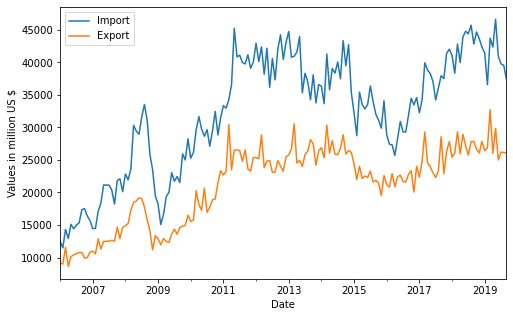

In [14]:
df.plot(figsize = (8,5))
plt.ylabel('Values in million US $')

In [15]:
window  = 12
df['MA_Import']= df['Import'].rolling(window).mean()
df['MA_Export']= df['Export'].rolling(window).mean()

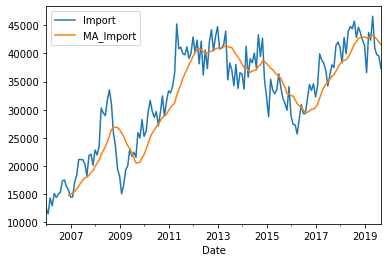

In [16]:
df[['Import', 'MA_Import']].plot()

In [17]:
df['Detrend_Import'] = df['Import']/df['MA_Import']
df['Detrend_Export'] = df['Export']/df['MA_Export']

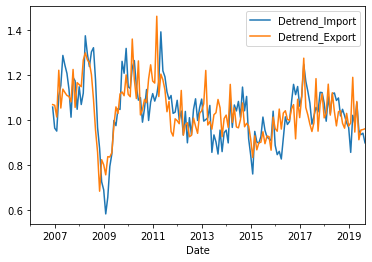

In [18]:
df[['Detrend_Import', 'Detrend_Export']].plot()

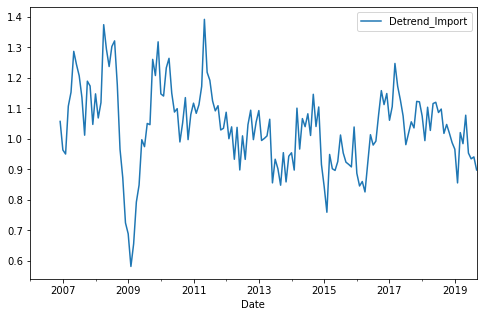

In [19]:
df[['Detrend_Import']].plot(figsize = (8,5))

In [20]:
df.dropna(inplace  = True)

In [21]:
df['Detrend_Import'][0::window]

Date
2006-12-31    1.057162
2007-12-31    1.047333
2008-12-31    0.724712
2009-12-31    1.318101
2010-12-31    1.079663
2011-12-31    1.034593
2012-12-31    1.054959
2013-12-31    0.943187
2014-12-31    0.915949
2015-12-31    1.038917
2016-12-31    1.148642
2017-12-31    1.121332
2018-12-31    0.987672
Freq: 12M, Name: Detrend_Import, dtype: float64

In [22]:
np.nanmean(df['Detrend_Import'][0::window])

1.036324781160308

In [23]:
# from pandas.core.nanops import nanmean as pd_nanmean
period_averages = [np.nanmean(df['Detrend_Import'][i::window], axis=0) for i in range(window)]

In [24]:
period_averages

[1.036324781160308,
 1.0024531033686004,
 0.9444326410371482,
 1.0422147581282046,
 1.0444553055839982,
 1.0982853240279102,
 1.051198994299927,
 1.0611264540087344,
 1.036200582520951,
 1.030368416066475,
 1.0755024704815053,
 1.0336229036576006]

In [25]:
period_norm_averages = period_averages / np.mean(period_averages, axis=0)

In [26]:
period_norm_averages

array([0.99837122, 0.96574003, 0.90984447, 1.00404549, 1.00620398,
       1.05806257, 1.01270069, 1.02226458, 0.99825157, 0.992633  ,
       1.0361141 , 0.9957683 ])

In [27]:
nobs = len(df)
seasonal = np.tile(period_norm_averages.T, nobs // window + 1).T[:nobs]

In [28]:
seasonal

array([0.99837122, 0.96574003, 0.90984447, 1.00404549, 1.00620398,
       1.05806257, 1.01270069, 1.02226458, 0.99825157, 0.992633  ,
       1.0361141 , 0.9957683 , 0.99837122, 0.96574003, 0.90984447,
       1.00404549, 1.00620398, 1.05806257, 1.01270069, 1.02226458,
       0.99825157, 0.992633  , 1.0361141 , 0.9957683 , 0.99837122,
       0.96574003, 0.90984447, 1.00404549, 1.00620398, 1.05806257,
       1.01270069, 1.02226458, 0.99825157, 0.992633  , 1.0361141 ,
       0.9957683 , 0.99837122, 0.96574003, 0.90984447, 1.00404549,
       1.00620398, 1.05806257, 1.01270069, 1.02226458, 0.99825157,
       0.992633  , 1.0361141 , 0.9957683 , 0.99837122, 0.96574003,
       0.90984447, 1.00404549, 1.00620398, 1.05806257, 1.01270069,
       1.02226458, 0.99825157, 0.992633  , 1.0361141 , 0.9957683 ,
       0.99837122, 0.96574003, 0.90984447, 1.00404549, 1.00620398,
       1.05806257, 1.01270069, 1.02226458, 0.99825157, 0.992633  ,
       1.0361141 , 0.9957683 , 0.99837122, 0.96574003, 0.90984

In [29]:
len(seasonal)

154

In [30]:
df['Seasonal_Import'] = seasonal

In [31]:
period_averages = [np.nanmean(df['Detrend_Export'][i::window], axis=0) for i in range(window)]
period_norm_averages = period_averages / np.mean(period_averages, axis=0)
nobs = len(df)
seasonal = np.tile(period_norm_averages.T, nobs // window + 1).T[:nobs]
df['Seasonal_Export'] = seasonal

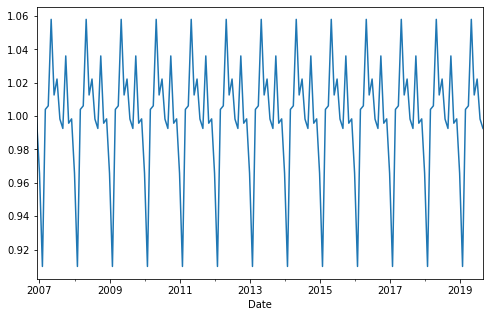

In [32]:
df['Seasonal_Import'].plot(figsize = (8,5))

In [33]:
df['Randomness_Import'] = df['Detrend_Import'] / df['Seasonal_Import']
df['Randomness_Export'] = df['Detrend_Export'] / df['Seasonal_Export']

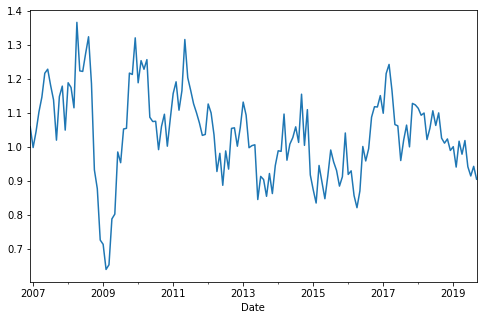

In [34]:
df['Randomness_Import'].plot(figsize = (8,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11F3D7B0>,
      dtype=object)

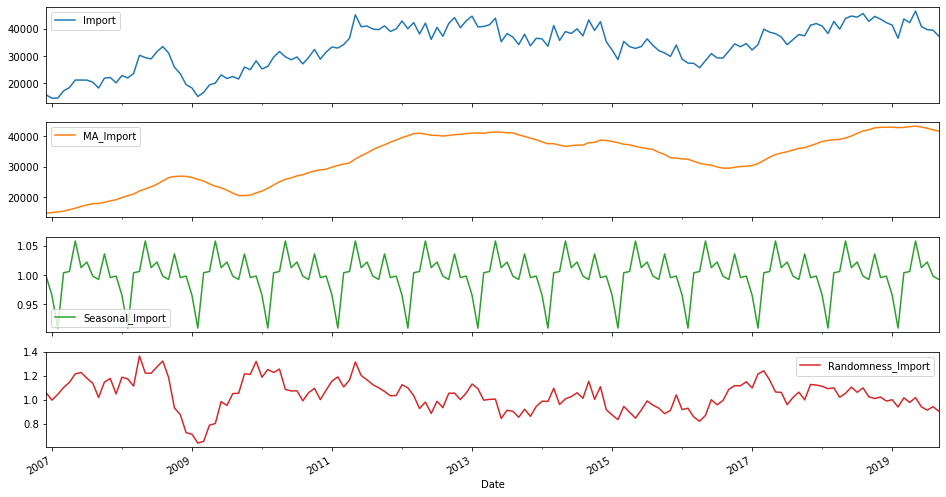

In [35]:
df[['Import', 'MA_Import', 'Seasonal_Import', 'Randomness_Import']].plot(subplots = True, figsize = (16,9))

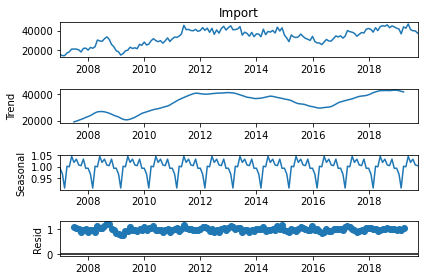

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Import'], model='multiplicative')
result.plot()
plt.show()

## This confirms that our splitting is perfect

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13A58370>,
      dtype=object)

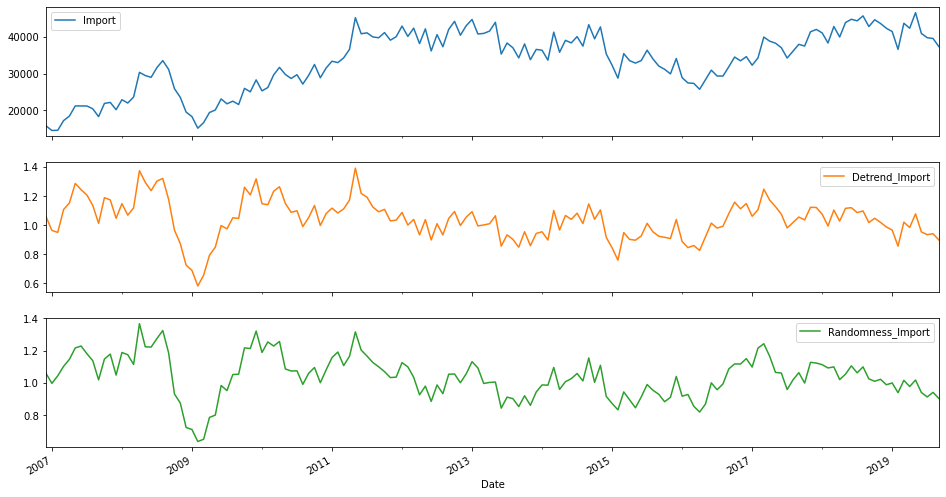

In [37]:
df[['Import', 'Detrend_Import', 'Randomness_Import']].plot(subplots = True, figsize = (16,9))

In [38]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [39]:
adf_test(df['Randomness_Import'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.624905
p-value                          0.000116
#Lags Used                       4.000000
Number of Observations Used    149.000000
Critical Value (1%)             -3.475018
Critical Value (5%)             -2.881141
Critical Value (10%)            -2.577221
dtype: float64


In [40]:
adf_test(df['Randomness_Export'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.768983
p-value                          0.003241
#Lags Used                       6.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64


## Import Forecast

In [41]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df['Randomness_Import'], nlags=12)
lag_pacf = pacf(df['Randomness_Import'], nlags=12, method='ols')

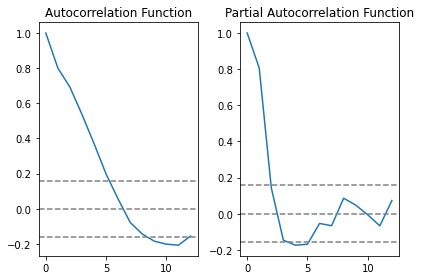

In [42]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [43]:
# ARMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# fit model
model = ARIMA(df['Randomness_Import'][:-12], order=(2, 0, 5))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df[:-12]), len(df[:-12]) + 11)



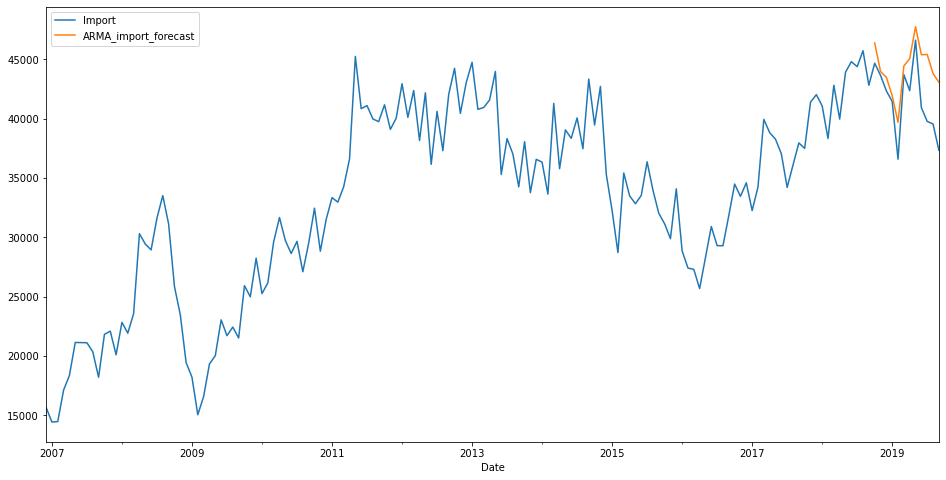

In [44]:
df['ARMA_import_forecast'] = yhat
df['ARMA_import_forecast'] = df['ARMA_import_forecast'] * df['Seasonal_Import'] * df['MA_Import']
df[['Import','ARMA_import_forecast']].plot(figsize = (16,8))

## Export Forecast

In [45]:
lag_acf = acf(df['Randomness_Export'], nlags=12)
lag_pacf = pacf(df['Randomness_Export'], nlags=12, method='ols')

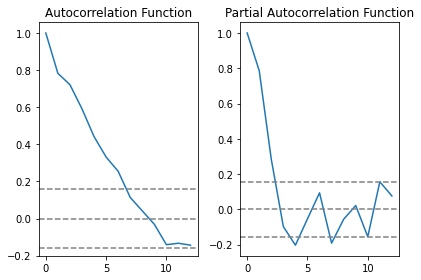

In [46]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [47]:
# ARMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# fit model
model = ARIMA(df['Randomness_Export'][:-12], order=(1, 0, 5))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df[:-12]), len(df[:-12]) + 11)



In [48]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Randomness_Export   No. Observations:                  142
Model:                     ARMA(1, 5)   Log Likelihood                 191.646
Method:                       css-mle   S.D. of innovations              0.062
Date:                Sun, 19 Apr 2020   AIC                           -367.293
Time:                        12:31:39   BIC                           -343.646
Sample:                    12-31-2006   HQIC                          -357.684
                         - 09-30-2018                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.0409      0.027     38.621      0.000       0.988       1.094
ar.L1.Randomness_Export     0.7769      0.104      7.489      0.000       0.574       0.980
ma.L1.Randomness_Export    -0.1913      0.129     -1.481      0.139      -0.444       0.062
ma.L2.Randomness_Export     0.2917      0.102      2.869      0.004       0.092       0.491
ma.L3.Randomness_Export     0.0764      0.101      0.753      0.451      -0.122       0.275
ma.L4.Randomness_Export    -0.0417      0.087     -0.479      0.632      -0.212       0.129
ma.L5.Randomness_Export     0.0439      0.099      0.442      0.659      -0.151       0.239
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2871           +0.0000j            1.2871            0.0000
MA.1           -1.9684           -0.0000j            1.9684           -0.5000
MA.2            0.0879           -1.6323j            1.6347           -0.2414
MA.3            0.0879           +1.6323j            1.6347            0.2414
MA.4            1.3708           -1.5649j            2.0803           -0.1355
MA.5            1.3708           +1.5649j            2.0803            0.1355
-----------------------------------------------------------------------------
"""

NormaltestResult(statistic=6.2174868681208215, pvalue=0.04465703460789817)


(array([ 3.,  4., 15., 19., 39., 35., 17.,  4.,  2.,  4.]),
 array([-0.17571964, -0.1387558 , -0.10179196, -0.06482812, -0.02786428,
         0.00909956,  0.0460634 ,  0.08302724,  0.11999108,  0.15695492,
         0.19391876]),
 <a list of 10 Patch objects>)

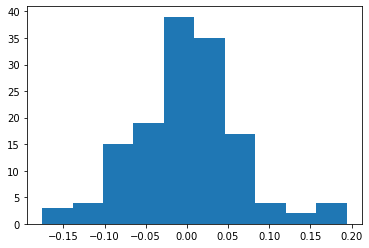

In [49]:
from scipy.stats import normaltest
resid = model_fit.resid
print(normaltest(resid))
plt.hist(resid)

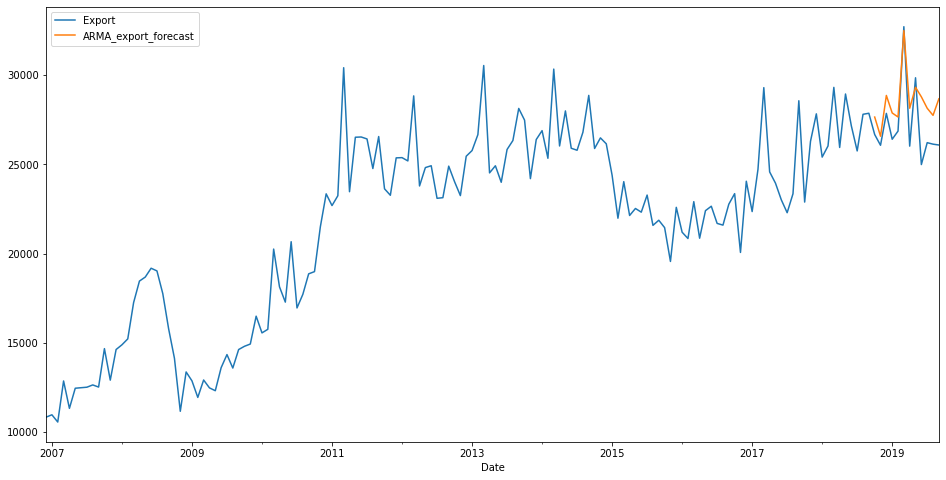

In [50]:
df['ARMA_export_forecast'] = yhat
df['ARMA_export_forecast'] = df['ARMA_export_forecast'] * df['Seasonal_Export'] * df['MA_Export']
df[['Export','ARMA_export_forecast']].plot(figsize = (16,8))

## Error

In [51]:
def rmse(predictions, targets): 
  return np.sqrt(((predictions - targets) ** 2).mean())

In [55]:
rmse(df['Import'][-12:], df['ARMA_import_forecast'][-12:]).round(2), rmse(df['Export'][-12:], df['ARMA_export_forecast'][-12:]).round(2)

(3238.24, 1762.79)

In [53]:
%matplotlib notebook

<IPython.core.display.Javascript object>


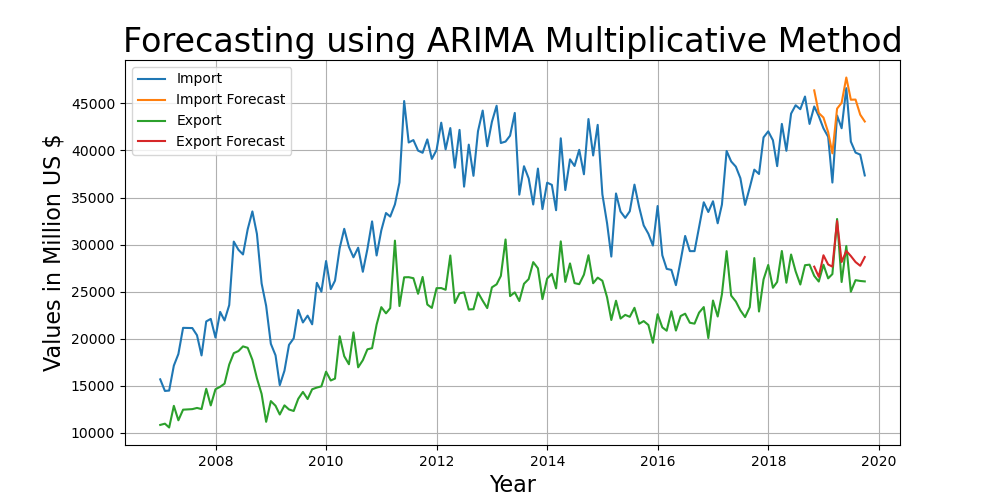

In [54]:
plt.figure(figsize=(10,5))
plt.plot( df['Import'], label='Import')
plt.plot( df['ARMA_import_forecast'], label='Import Forecast')
plt.plot( df['Export'], label='Export')
plt.plot( df['ARMA_export_forecast'], label='Export Forecast')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Values in Million US $', fontsize = 16)
plt.title('Forecasting using ARIMA Multiplicative Method', fontsize = 24)
plt.grid()
plt.legend()
plt.show()